In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("Amazon Sale Report.csv")

In [4]:
data.shape

(10003, 12)

In [5]:
data.head()

,index,OrderID,Date,Status,Fulfilment,Category,CourierStatus,Qty,Amount,shipstate,shippostalcode,B2B
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Set,Cancelled,0,647.62,MAHARASHTRA,400081.0,False
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,kurta,Shipped,1,406.00,KARNATAKA,560085.0,False
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,kurta,Shipped,1,329.00,MAHARASHTRA,410210.0,True
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Western Dress,Cancelled,0,753.33,PUDUCHERRY,605008.0,False
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Top,Shipped,1,574.00,TAMIL NADU,600073.0,False


In [6]:
le = LabelEncoder()

In [7]:
data.dtypes

index               int64
OrderID            object
Date               object
Status             object
Fulfilment         object
Category           object
CourierStatus      object
Qty                 int64
Amount            float64
shipstate          object
shippostalcode    float64
B2B                  bool
dtype: object

In [8]:
data.Amount.describe()

count    9388.000000
mean      623.266006
std       272.453080
min         0.000000
25%       435.000000
50%       568.000000
75%       771.000000
max      2224.000000
Name: Amount, dtype: float64

In [9]:
data.isnull().sum()

index               0
OrderID             0
Date                0
Status              0
Fulfilment          0
Category            0
CourierStatus     641
Qty                 0
Amount            615
shipstate           3
shippostalcode      3
B2B                 0
dtype: int64

In [10]:
data.shape

(10003, 12)

In [11]:
data.CourierStatus=data.CourierStatus.fillna("Cancelled")
data.Amount=data.Amount.fillna(data.Amount.mean())
data.shipstate=data.shipstate.fillna("Maharashtra")
data.shippostalcode=data.shippostalcode.fillna(444606)


In [12]:
data.isnull().sum()

index             0
OrderID           0
Date              0
Status            0
Fulfilment        0
Category          0
CourierStatus     0
Qty               0
Amount            0
shipstate         0
shippostalcode    0
B2B               0
dtype: int64

In [13]:
# Data Visualization

<Axes: ylabel='Amount'>

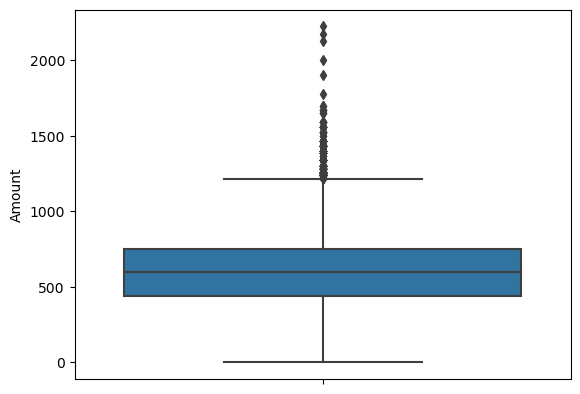

In [14]:
#creating a boxplot to find outliers
sns.boxplot(data=data,y="Amount")

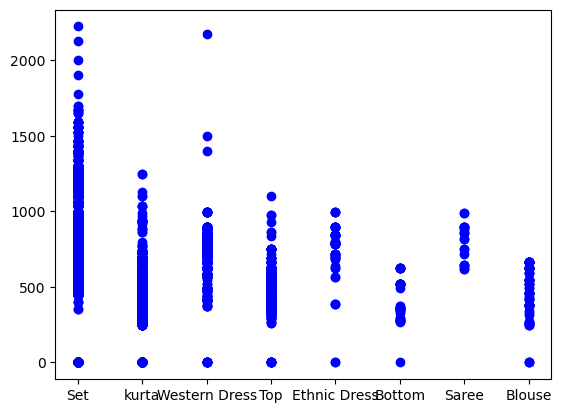

In [15]:
# Scatter Plot

x = data.Category
y = data.Amount
plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

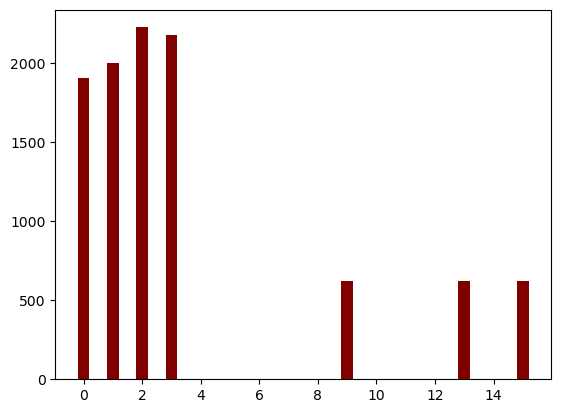

In [19]:
# creating the bar plot
x = data.Qty
y = data.Amount
plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.show()

In [20]:
data.dtypes

index               int64
OrderID            object
Date               object
Status             object
Fulfilment         object
Category           object
CourierStatus      object
Qty                 int64
Amount            float64
shipstate          object
shippostalcode    float64
B2B                  bool
dtype: object

In [21]:
data.OrderID=le.fit_transform(data.OrderID)
data.Date=le.fit_transform(data.Date)
data.Status=le.fit_transform(data.Status)
data.Fulfilment=le.fit_transform(data.Fulfilment)
data.Category=le.fit_transform(data.Category)
data.CourierStatus=le.fit_transform(data.CourierStatus)
data.Qty=le.fit_transform(data.Qty)
data.Amount=le.fit_transform(data.Amount)
data.shipstate=le.fit_transform(data.shipstate)
data.shippostalcode=le.fit_transform(data.shippostalcode)
data.B2B=le.fit_transform(data.B2B)

In [22]:
data.head()

,index,OrderID,Date,Status,Fulfilment,Category,CourierStatus,Qty,Amount,shipstate,shippostalcode,B2B
0,0,5516,6,0,1,4,0,0,258,22,879,0
1,1,1120,6,2,1,7,1,1,85,18,1735,0
2,2,3564,6,1,0,7,1,1,35,22,982,1
3,3,3434,6,0,1,6,0,0,310,33,2049,0
4,4,6969,6,1,0,5,1,1,214,41,1978,0


In [23]:
c=data.corr()
c

,index,OrderID,Date,Status,Fulfilment,Category,CourierStatus,Qty,Amount,shipstate,shippostalcode,B2B
index,1.000000,-0.001681,-0.988940,0.095101,0.152822,-0.016270,-0.013522,-0.009866,0.003184,0.007612,-0.019398,0.005785
OrderID,-0.001681,1.000000,0.001963,0.007799,0.005001,0.013041,0.002206,0.007335,-0.046046,0.006275,-0.020977,-0.007175
Date,-0.988940,0.001963,1.000000,-0.096387,-0.151005,0.016232,0.011805,0.008926,-0.003709,-0.008115,0.021747,-0.000591
Status,0.095101,0.007799,-0.096387,1.000000,0.541430,0.001075,0.276008,0.480374,-0.012875,-0.004414,-0.009841,0.020800
Fulfilment,0.152822,0.005001,-0.151005,0.541430,1.000000,0.020290,-0.212026,-0.160327,-0.018459,-0.002416,-0.021267,0.008430
Category,-0.016270,0.013041,0.016232,0.001075,0.020290,1.000000,-0.012406,-0.011249,-0.565627,0.038870,0.073004,-0.004424
CourierStatus,-0.013522,0.002206,0.011805,0.276008,-0.212026,-0.012406,1.000000,0.840996,-0.013829,-0.022510,0.006223,0.001306
Qty,-0.009866,0.007335,0.008926,0.480374,-0.160327,-0.011249,0.840996,1.000000,-0.009344,-0.018538,-0.002698,0.010566
Amount,0.003184,-0.046046,-0.003709,-0.012875,-0.018459,-0.565627,-0.013829,-0.009344,1.000000,-0.011907,-0.046252,0.008448
shipstate,0.007612,0.006275,-0.008115,-0.004414,-0.002416,0.038870,-0.022510,-0.018538,-0.011907,1.000000,0.056602,0.019091


In [24]:
#dividing the dataset
data_x=data.iloc[:,1:11]
data_y=data.iloc[:,11]

In [25]:
print(data_x)

       OrderID  Date  Status  Fulfilment  Category  CourierStatus  Qty  \
0         5516     6       0           1         4              0    0   
1         1120     6       2           1         7              1    1   
2         3564     6       1           0         7              1    1   
3         3434     6       0           1         6              0    0   
4         6969     6       1           0         5              1    1   
...        ...   ...     ...         ...       ...            ...  ...   
9998      6653     0       1           0         4              1    1   
9999      3684     0       0           1         7              0    0   
10000      758     0       2           1         4              1    1   
10001     4057     0       2           1         4              1    1   
10002     5118     0       1           0         4              1    1   

       Amount  shipstate  shippostalcode  
0         258         22             879  
1          85         18 

In [26]:
print(data_y)

0        0
1        0
2        1
3        0
4        0
        ..
9998     0
9999     0
10000    0
10001    0
10002    0
Name: B2B, Length: 10003, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3,random_state=205)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7002, 10), (3001, 10), (7002,), (3001,))

In [37]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [38]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

C:\Users\gayat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.9913362212595801


In [40]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.9913362212595801


In [52]:
# Decision Tree Algorithm

from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()

In [53]:
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.9853382205931356
